In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from plotnine import *

In [2]:
d = pd.read_csv('rank_runs_summary.csv')

d

,example_name,estimate_name,SpearmanR_all,SpearmanR_test,pick_SpearmanR,pick_auc,data_size,test_size,run_i,rand_seed
0,uci wine example,Stan model,0.610662,0.609845,0.530252,0.882675,6497,6017,0,518677876
1,uci wine example,logistic model,0.635800,0.635268,0.523220,0.877600,6497,6017,0,518677876
2,uci wine example,Stan comparisons model,0.608699,0.608356,0.527170,0.880450,6497,6017,0,518677876
3,uci wine example,Stan model,0.894498,0.893974,0.562953,0.906275,6497,6025,1,1451336747
4,uci wine example,logistic model,0.882927,0.882193,0.559767,0.903975,6497,6025,1,1451336747
...,...,...,...,...,...,...,...,...,...,...
295,uci wine example,logistic model,0.618042,0.621942,0.567197,0.909338,6497,6011,98,183758983
296,uci wine example,Stan comparisons model,0.652293,0.656060,0.574402,0.914500,6497,6011,98,183758983
297,uci wine example,Stan model,0.750157,0.750255,0.475311,0.843025,6497,6015,99,51265350
298,uci wine example,logistic model,0.782493,0.782851,0.474654,0.842550,6497,6015,99,51265350


In [3]:
d_SpearmanR = d.melt(
    id_vars=['example_name', 'estimate_name'],
    value_vars=['SpearmanR_all', 'SpearmanR_test', 'pick_SpearmanR'],
    var_name='measurement',
    value_name='Spearman R',
)

d_SpearmanR

,example_name,estimate_name,measurement,Spearman R
0,uci wine example,Stan model,SpearmanR_all,0.610662
1,uci wine example,logistic model,SpearmanR_all,0.635800
2,uci wine example,Stan comparisons model,SpearmanR_all,0.608699
3,uci wine example,Stan model,SpearmanR_all,0.894498
4,uci wine example,logistic model,SpearmanR_all,0.882927
...,...,...,...,...
895,uci wine example,logistic model,pick_SpearmanR,0.567197
896,uci wine example,Stan comparisons model,pick_SpearmanR,0.574402
897,uci wine example,Stan model,pick_SpearmanR,0.475311
898,uci wine example,logistic model,pick_SpearmanR,0.474654


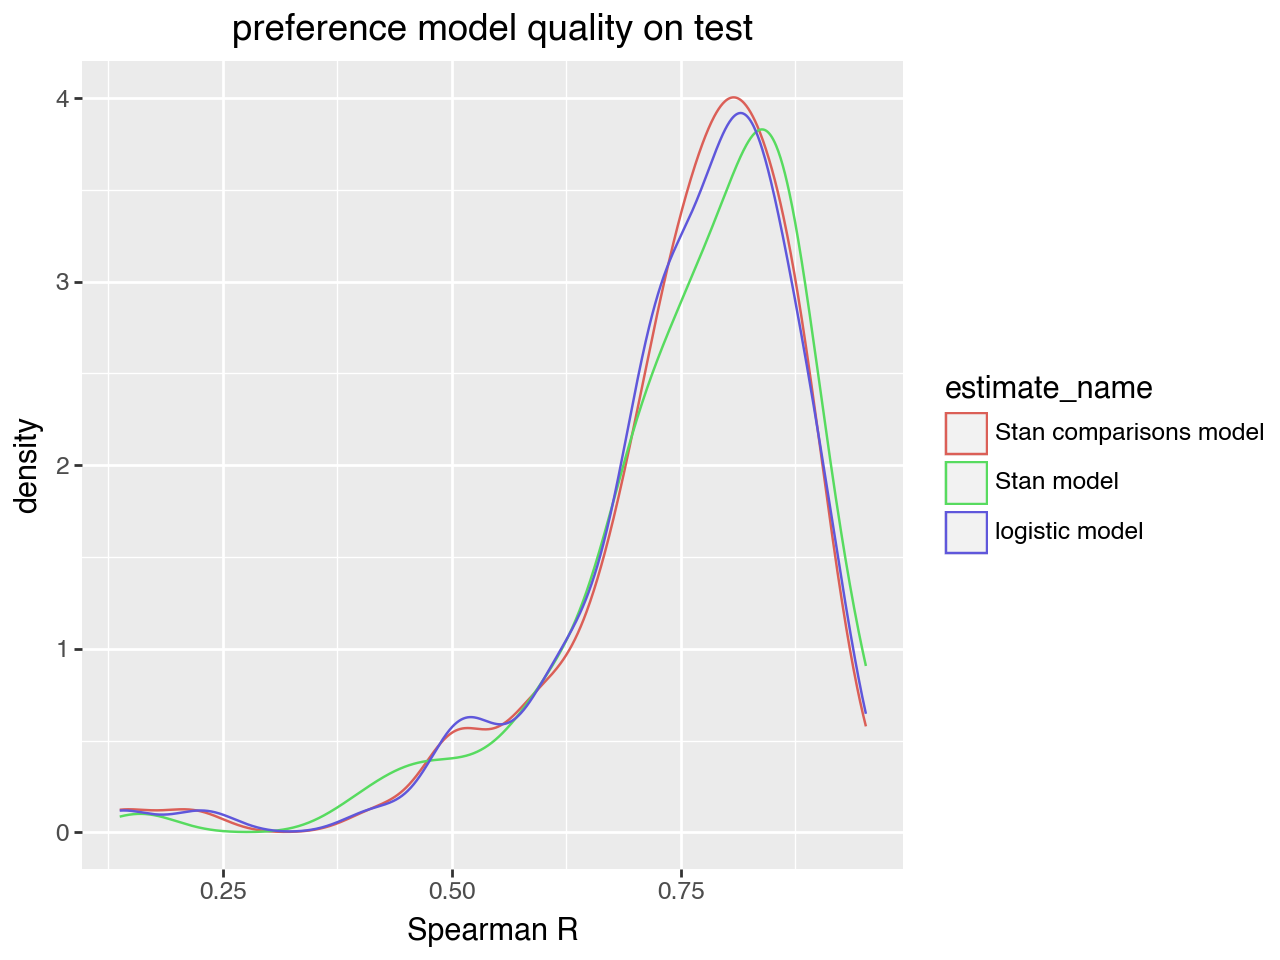

In [4]:
(
    ggplot(
        data=d_SpearmanR.loc[d_SpearmanR['measurement'] == 'SpearmanR_test', :],
        mapping=aes(
            x='Spearman R',
            color='estimate_name',
        )
    )
    + geom_density()
    + ggtitle("preference model quality on test")
)

In [5]:
model = ols(
    'SpearmanR_test ~ estimate_name + pick_SpearmanR + pick_auc + pick_SpearmanR * pick_auc',
    data=d,
).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.947
Date:                Sun, 25 Aug 2024   Prob (F-statistic):             0.0865
Time:                        07:12:29   Log-Likelihood:                 182.75
No. Observations:                 300   AIC:                            -353.5
Df Residuals:                     294   BIC:                            -331.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -88.5337    104.927     -0.844      0.399    -295.037     117.970
estimate_name[T.Stan model]      7.884e-05      0.021      0.004      0.997      -0.042       0.042
estimate_name[T.logistic model]    -0.0049      0.021     -0.231      0.817      -0.046       0.037
pick_SpearmanR                   -120.3464    154.707     -0.778      0.437    -424.820     184.128
pick_auc                          175.8335    210.467      0.835      0.404    -238.378     590.046
pick_SpearmanR:pick_auc            -4.4782     11.069     -0.405      0.686     -26.263      17.307
==============================================================================
Omnibus:                      108.349   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.413
Skew:                          -1.648   Prob(JB):                     1.19e-69
Kurtosis:                       6.811   Cond. No.                     5.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""